In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline


In [2]:
df = pd.read_csv(r'C:\Users\kelvin\Downloads\diabetes.csv')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
    df[column]=df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mean) 

In [4]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x =StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
model = classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score

model.fit(X_train,y_train)
y_predict =(model.predict(X_test))
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8051948051948052


col_0,0,1
Outcome,,
0,95,12
1,18,29


In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [9]:
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [10]:
from collections  import Counter
print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 393, 1: 221})
Counter({1: 393, 0: 393})


In [11]:
from sklearn.metrics import accuracy_score

model.fit(X_train_smote,y_train_smote)
y_predict =(model.predict(X_test))
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7532467532467533


col_0,0,1
Outcome,,
0,78,29
1,9,38


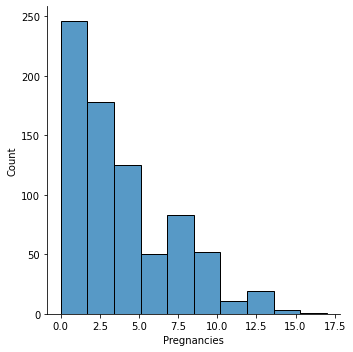

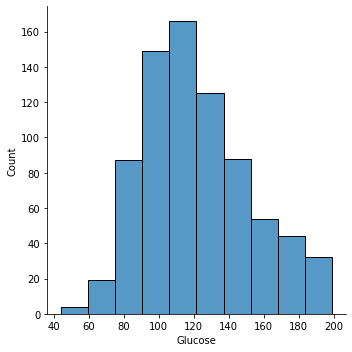

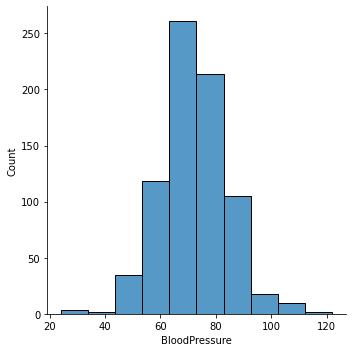

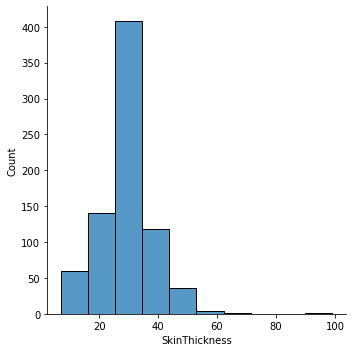

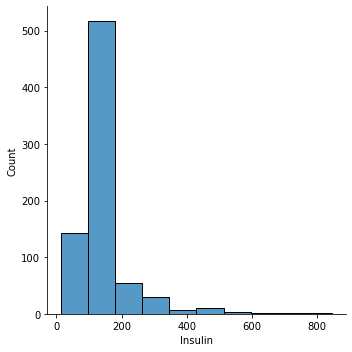

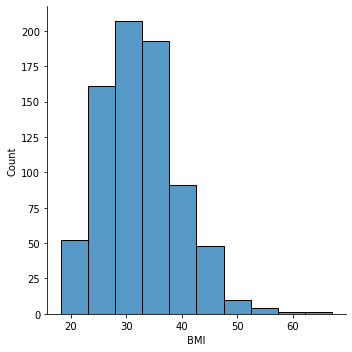

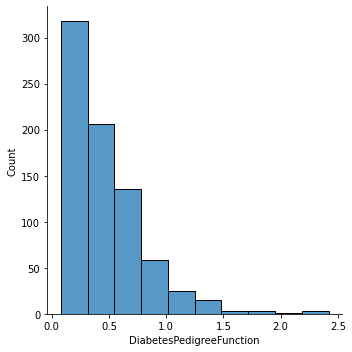

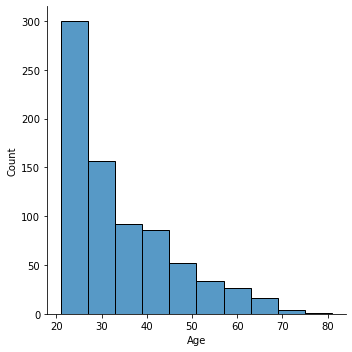

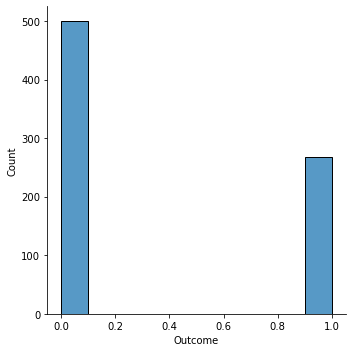

In [12]:
import seaborn as sns
plo = []
for column in df:
    k=sns.displot(bins=10,x=column,data=df)
    plo.append(k)
    

AttributeError: 'str' object has no attribute 'value_counts'